## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [2]:
import pandas as pd
data_hf = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print(data_hf.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [3]:
missing_values = data_hf.isnull().sum()
print(missing_values)
print("\nDataset obsahuje chýbajúce hodnoty:", data_hf.isnull().values.any())


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Dataset obsahuje chýbajúce hodnoty: False


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [4]:
print(data_hf.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [5]:
duplicate_rows = data_hf.duplicated().sum()
print(f"Počet duplicitných záznamov v datasete: {duplicate_rows}")

Počet duplicitných záznamov v datasete: 0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

sex
1    194
0    105
Name: count, dtype: int64


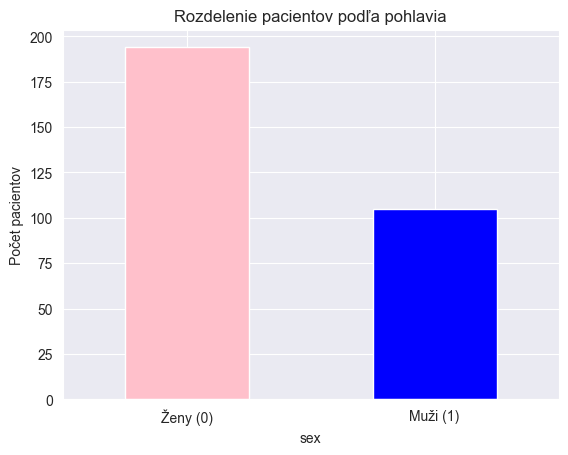

In [6]:
sex_counts = data_hf["sex"].value_counts()
print(sex_counts)

import matplotlib.pyplot as plt

sex_counts.plot(kind="bar", color=["pink", "blue"])
plt.xticks(ticks=[0, 1], labels=["Ženy (0)", "Muži (1)"], rotation=0)
plt.ylabel("Počet pacientov")
plt.title("Rozdelenie pacientov podľa pohlavia")
plt.show()

**Koľko záznamov mužov a žien obsahuje dataset?**

**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [7]:
non_smokers = data_hf[data_hf["smoking"] == 0]
non_smokers_counts = non_smokers["sex"].value_counts()

print(f"Počet nefajčiarov - Ženy (0): {non_smokers_counts.get(0, 0)}")
print(f"Počet nefajčiarov - Muži (1): {non_smokers_counts.get(1, 0)}")


Počet nefajčiarov - Ženy (0): 101
Počet nefajčiarov - Muži (1): 102


### Úloha 3 (1b)

Popíšte premennú vek ('age').

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


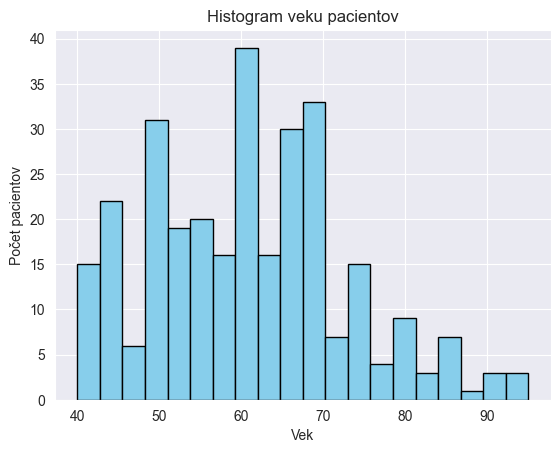

In [8]:
age_desc = data_hf["age"].describe()
print(age_desc)

import matplotlib.pyplot as plt

plt.hist(data_hf["age"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Vek")
plt.ylabel("Počet pacientov")
plt.title("Histogram veku pacientov")
plt.show()


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [9]:
min_age = data_hf["age"].min()
max_age = data_hf["age"].max()
mean_age = data_hf["age"].mean()

print(f"Minimálny vek pacienta: {min_age}")
print(f"Maximálny vek pacienta: {max_age}")
print(f"Priemerný vek pacientov: {mean_age:.2f}")

Minimálny vek pacienta: 40.0
Maximálny vek pacienta: 95.0
Priemerný vek pacientov: 60.83


**Z akého veku je v datasete najviac záznamov?**

In [10]:
most_common_age = data_hf["age"].mode()[0]
age_count = data_hf["age"].value_counts().max()

print(f"Najčastejšie sa vyskytujúci vek: {most_common_age} (počet výskytov: {age_count})")


Najčastejšie sa vyskytujúci vek: 60.0 (počet výskytov: 33)


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

In [11]:
data_hf["risk"] = data_hf.apply(lambda row: "High" if row["age"] > 50 and row["serum_creatinine"] > 1.2 else "Low", axis=1)
print(data_hf[["age", "serum_creatinine", "risk"]].head())

    age  serum_creatinine  risk
0  75.0               1.9  High
1  55.0               1.1   Low
2  65.0               1.3  High
3  50.0               1.9   Low
4  65.0               2.7  High


Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

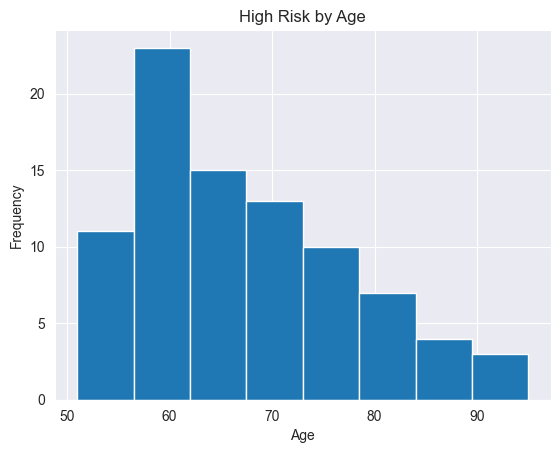

In [12]:
import matplotlib.pyplot as plt

high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


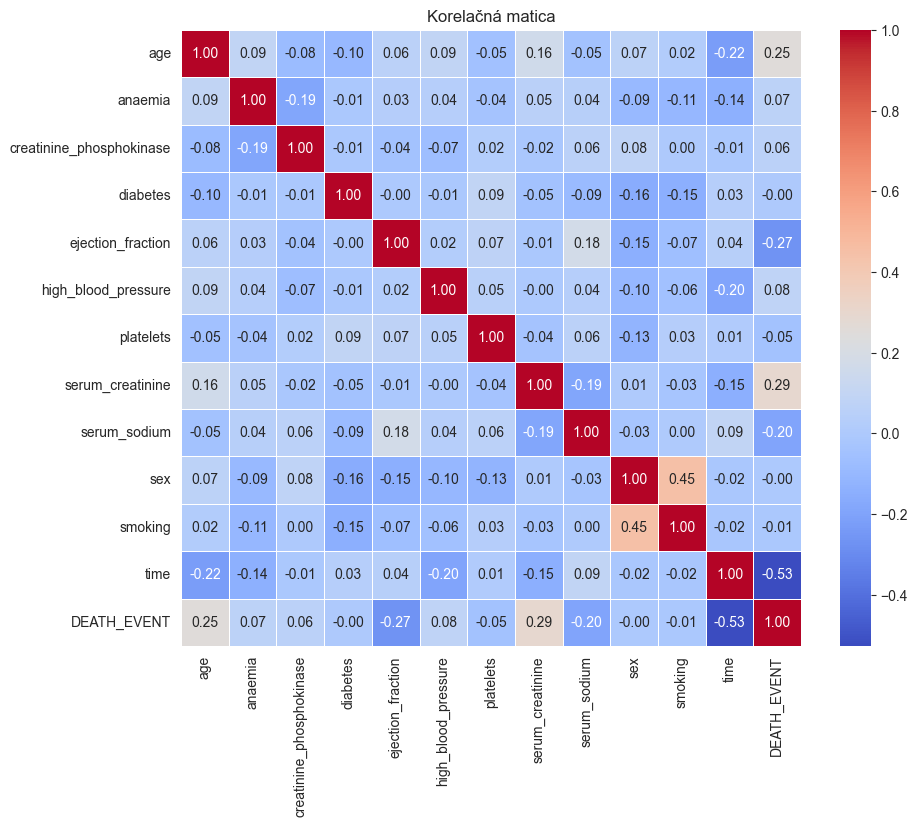

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = data_hf.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelačná matica')
plt.show()


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [16]:
negative_corr = correlation_matrix[correlation_matrix < 0]
negative_corr_pairs = negative_corr.unstack().sort_values(ascending=True)
negative_corr_pairs = negative_corr_pairs[negative_corr_pairs < 0]
negative_corr_pairs = negative_corr_pairs[negative_corr_pairs.index.map(lambda x: x[0] < x[1])]

print(negative_corr_pairs.head(2))


DEATH_EVENT  time                -0.526964
             ejection_fraction   -0.268603
dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [19]:
positive_corr = correlation_matrix[correlation_matrix > 0]
positive_corr_pairs = positive_corr.unstack().sort_values(ascending=False)
positive_corr_pairs = positive_corr_pairs[positive_corr_pairs < 1]
positive_corr_pairs = positive_corr_pairs[positive_corr_pairs.index.map(lambda x: x[0] < x[1])]

print(positive_corr_pairs.head(1))


sex  smoking    0.445892
dtype: float64


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure